In [1]:
# Load our word2vec model
import gensim
w2v_model = gensim.models.word2vec.Word2Vec.load("./results/word2vec_model_trained_on_cluster0.w2v")
print("Model loaded")


Model loaded


In [11]:
#Select 10000 words from our vocabulary
from __future__ import absolute_import, division, print_function
import numpy as np
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
word_list = []
i = 0
# modified here : add .wv. between
for word in w2v_model.wv.vocab:
    word_vectors_matrix[i] = w2v_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (10000, 300)


/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [12]:
#Compress the word vectors into 2D space
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (10000, 2)


In [13]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")

Points DataFrame built


In [14]:
points.head(10)

,word,x,y
0,I,-4.852140,3.975579
1,have,-10.603408,46.221676
2,had,-9.768671,-5.717585
3,an,-12.059372,-9.078150
4,older,3.509319,13.363709
5,edition,0.037592,16.285164
6,of,-10.536367,0.116891
7,this,-14.845828,3.415923
8,cookbook,-5.831990,5.884010
9,for,-15.447880,3.308548


Text(0.5, 1.0, 'Visualizing word2vec with t-SNE in 2D')

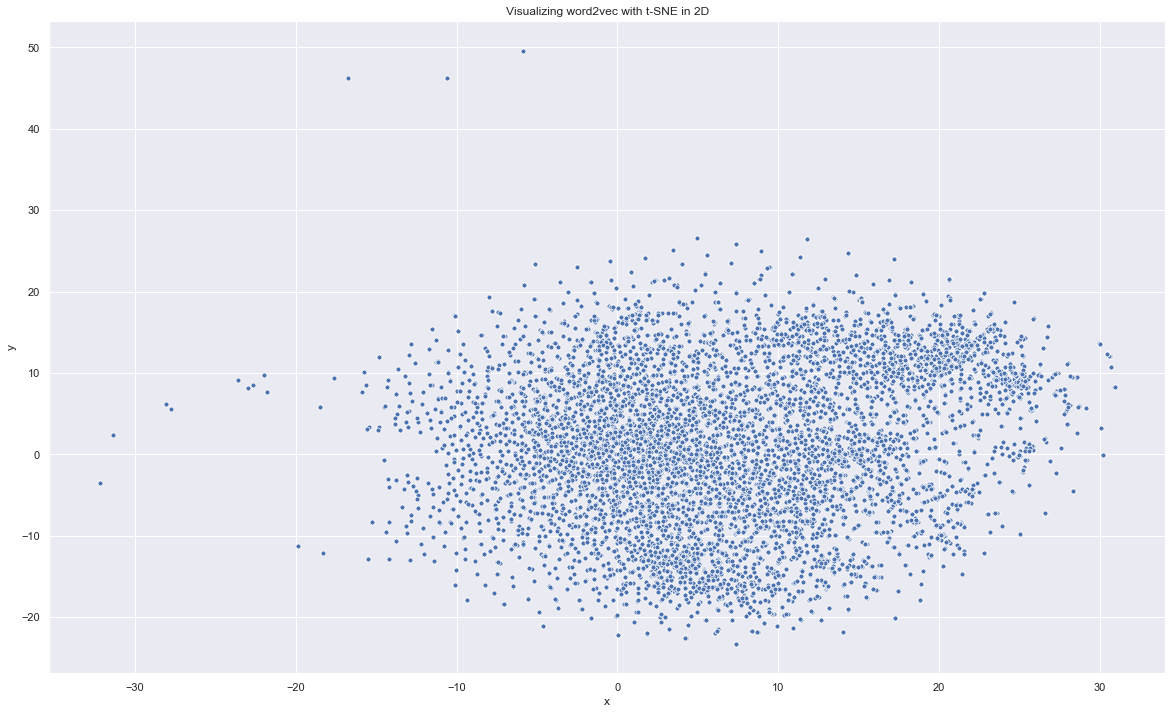

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#sns.set_context("poster")
sns.set()
plt.figure(figsize=(20, 12))
sns.scatterplot(x="x", y="y",s=25, data=points).set_title('Visualizing word2vec with t-SNE in 2D')
#points.sns.scatter("x", "y", s=10, figsize=(20, 12))

In [221]:
def visualizing(w2v_model):
    w2v_model = gensim.models.word2vec.Word2Vec.load(w2v_model)
    print("Model loaded")
    count = len([word for word in w2v_model.wv.vocab])
    word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
    word_list = []
    i = 0
    # modified here : add .wv. between
    for word in w2v_model.wv.vocab:
        word_vectors_matrix[i] = w2v_model[word]
        word_list.append(word)
        i = i+1
        if i == count:
            break
    print("word_vectors_matrix shape is ", word_vectors_matrix.shape)
    tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
    word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
    print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)
    points = pd.DataFrame(
        [
            (word, coords[0], coords[1]) 
            for word, coords in [
                (word, word_vectors_matrix_2d[word_list.index(word)])
                for word in word_list
            ]
        ],
        columns=["word", "x", "y"]
    )
    print("Points DataFrame built")
    sns.set()
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="x", y="y",s=25, data=points).set_title('Visualizing word2vec with t-SNE in 2D')
    return points

Model loaded
word_vectors_matrix shape is  (3963, 300)


/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


word_vectors_matrix_2d shape is  (3963, 2)
Points DataFrame built


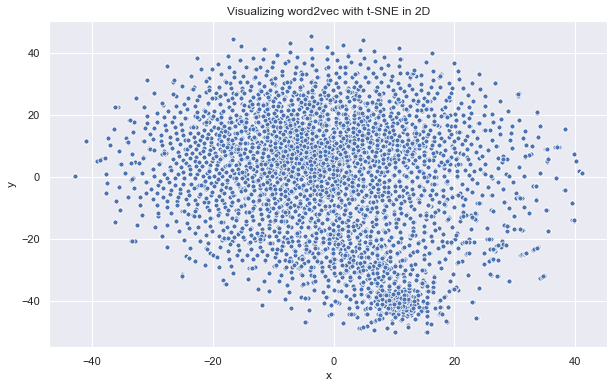

In [222]:
points0 = visualizing("word2vec_model_trained_on_cluster0.w2v")

Model loaded
word_vectors_matrix shape is  (6355, 300)


/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


word_vectors_matrix_2d shape is  (6355, 2)
Points DataFrame built


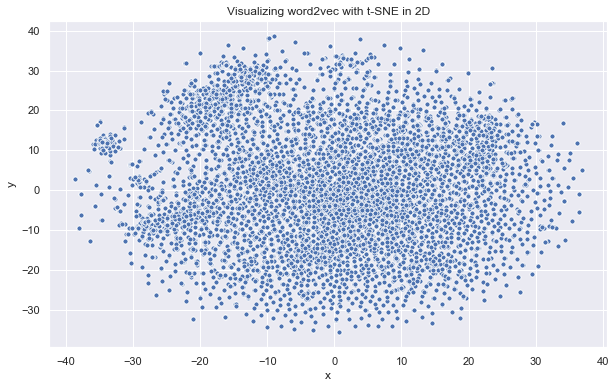

In [223]:
points1 = visualizing("word2vec_model_trained_on_cluster1.w2v")

Model loaded
word_vectors_matrix shape is  (7434, 300)


/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


word_vectors_matrix_2d shape is  (7434, 2)
Points DataFrame built


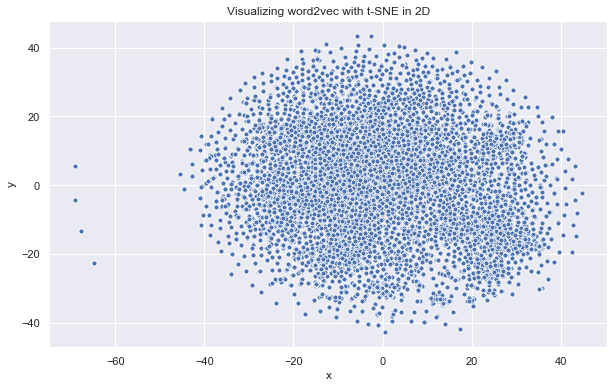

In [224]:
points2 = visualizing("word2vec_model_trained_on_cluster2.w2v")

In [236]:
def plot_region(points, x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1]) 
    ]
    sns.set()
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 6))
    
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=10)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


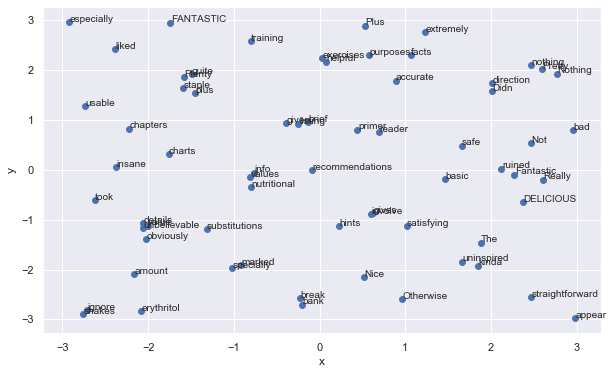

In [238]:
plot_region(points0,x_bounds=(-3, 3), y_bounds=(-3, 3))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


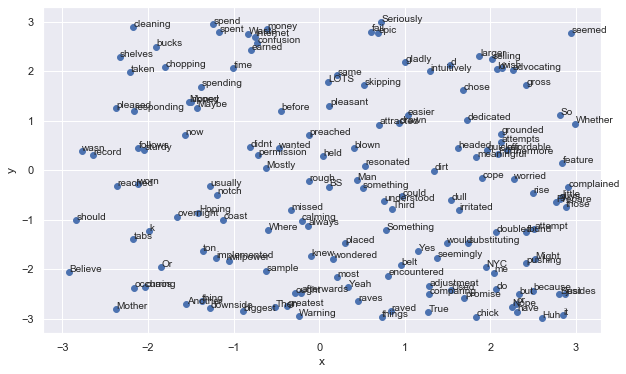

In [239]:
plot_region(points1,x_bounds=(-3, 3), y_bounds=(-3, 3))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


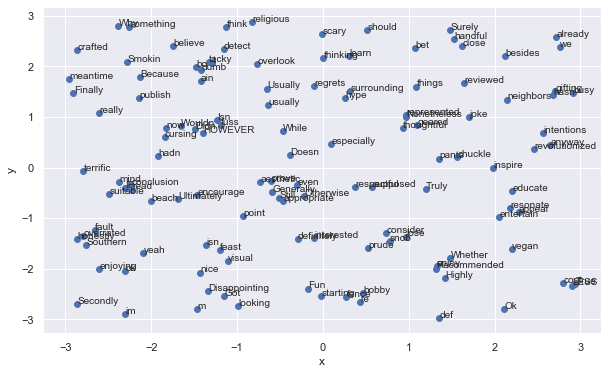

In [240]:
plot_region(points2,x_bounds=(-3, 3), y_bounds=(-3, 3))

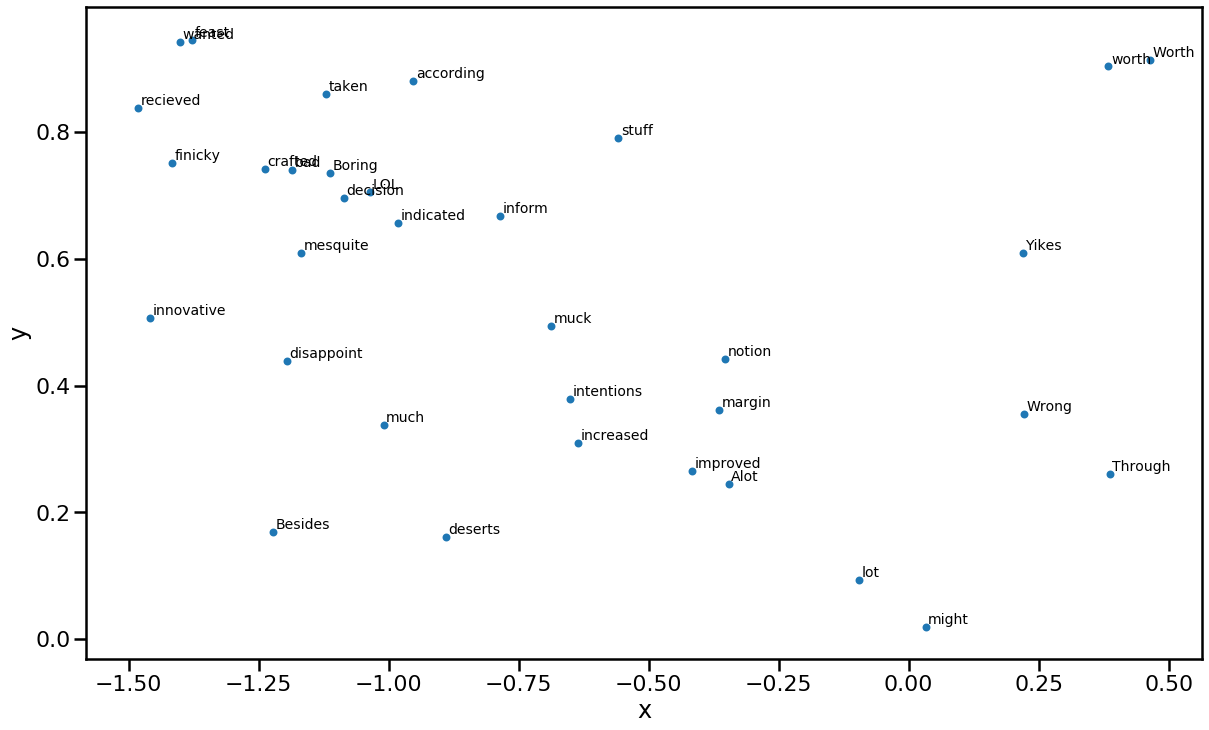

In [55]:
plot_region(x_bounds=(-1.5, 0.5), y_bounds=(0, 1))

In [56]:
w2v_model.most_similar("finicky")

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('weeknight', 0.5893139839172363),
 ('Boring', 0.5406417846679688),
 ('chuckle', 0.5049604177474976),
 ('demonstrate', 0.492179274559021),
 ('neighbors', 0.4912661910057068),
 ('tweaking', 0.4782395660877228),
 ('costly', 0.47637298703193665),
 ('deception', 0.4725904166698456),
 ('grandmas', 0.47224852442741394),
 ('pants', 0.46768203377723694)]

In [57]:
w2v_model.most_similar("boring")

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('embarrassing', 0.4263598918914795),
 ('whinny', 0.42492443323135376),
 ('whiny', 0.41685184836387634),
 ('unfunny', 0.4132866859436035),
 ('distracting', 0.41309767961502075),
 ('uninteresting', 0.4095303416252136),
 ('entertained', 0.40329355001449585),
 ('irreverent', 0.40149205923080444),
 ('convoluted', 0.39923521876335144),
 ('cutesy', 0.3979986310005188)]

In [34]:
w2v_model.most_similar("wrong")

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Thankfully', 0.36049777269363403),
 ('appealed', 0.357385516166687),
 ('identifying', 0.35487130284309387),
 ('Anything', 0.33584874868392944),
 ('soooo', 0.32870036363601685),
 ('Boring', 0.3278414011001587),
 ('Whatever', 0.32616913318634033),
 ('innovative', 0.3248562514781952),
 ('controversy', 0.3233680725097656),
 ('Nobody', 0.3229694664478302)]

In [35]:
w2v_model.most_similar("regrets")

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('metric', 0.5395511388778687),
 ('fussing', 0.5344605445861816),
 ('Uh', 0.5285961627960205),
 ('kidding', 0.519378662109375),
 ('fence', 0.5182406306266785),
 ('forewarned', 0.5152499675750732),
 ('browsing', 0.5152417421340942),
 ('Ugh', 0.5146034359931946),
 ('fuss', 0.5127820372581482),
 ('mistaken', 0.49522697925567627)]

In [36]:
w2v_model.most_similar("mistaken")

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Boring', 0.5666701793670654),
 ('preview', 0.5615953207015991),
 ('foolish', 0.561124324798584),
 ('luckily', 0.5502995252609253),
 ('homage', 0.5461632013320923),
 ('Disappointed', 0.5445528030395508),
 ('dime', 0.5404908657073975),
 ('recieved', 0.5322041511535645),
 ('Thought', 0.5279327034950256),
 ('screenplay', 0.526364803314209)]

In [ ]:
w2v_model.most_similar("regrets")

In [38]:
w2v_model.most_similar("overrated")

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('deception', 0.5739672183990479),
 ('Sounds', 0.56304931640625),
 ('overdo', 0.5623999238014221),
 ('dumb', 0.5583958625793457),
 ('Boring', 0.5576906800270081),
 ('Isa', 0.5559347867965698),
 ('MFK', 0.5493453741073608),
 ('quoted', 0.5490086078643799),
 ('Fisher', 0.5456129908561707),
 ('donating', 0.5454994440078735)]

In [52]:
w2v_model.most_similar("easy")


/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Easy', 0.4666033983230591),
 ('doable', 0.3953128457069397),
 ('follow', 0.3930917978286743),
 ('digest', 0.38973334431648254),
 ('Tasty', 0.3835809528827667),
 ('uncommon', 0.38335874676704407),
 ('wonderfully', 0.37947624921798706),
 ('guides', 0.3736414611339569),
 ('straightforward', 0.3727957010269165),
 ('tabs', 0.3683742582798004)]

In [44]:
import pandas as pd
df = pd.read_csv('review_join_cluster.csv')

In [70]:
w2v_model.most_similar(positive=['work','meal'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('weeknight', 0.3877827525138855),
 ('reheat', 0.37580254673957825),
 ('schedule', 0.369904100894928),
 ('sustain', 0.3691611886024475),
 ('Trader', 0.3688061237335205),
 ('refrigerate', 0.3685881793498993),
 ('cater', 0.3671153783798218),
 ('ponder', 0.365770161151886),
 ('Pros', 0.3631299138069153),
 ('max', 0.3574379086494446),
 ('godsend', 0.35397613048553467),
 ('intuition', 0.3536665439605713),
 ('supper', 0.3536553978919983),
 ('advance', 0.3509930968284607),
 ('wash', 0.34829217195510864),
 ('chop', 0.3470761179924011),
 ('Tasty', 0.34684839844703674),
 ('nanny', 0.3465384840965271),
 ('Given', 0.34555143117904663),
 ('flattened', 0.34544846415519714)]

In [66]:
w2v_model.most_similar(positive=['children','food'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('deceptively', 0.49335747957229614),
 ('deceive', 0.4909404516220093),
 ('mum', 0.47871634364128113),
 ('Sort', 0.4783153533935547),
 ('chain', 0.4693778157234192),
 ('snacks', 0.46925434470176697),
 ('attractive', 0.46255433559417725),
 ('buds', 0.4624426066875458),
 ('grader', 0.4597395956516266),
 ('Recommended', 0.45821642875671387),
 ('vegans', 0.4535810649394989),
 ('fussy', 0.45340389013290405),
 ('grandchildren', 0.452176570892334),
 ('cater', 0.4469228982925415),
 ('ages', 0.4441632628440857),
 ('researchers', 0.4427904486656189),
 ('chains', 0.43981504440307617),
 ('gobble', 0.4371757209300995),
 ('Populations', 0.4359987676143646),
 ('mouths', 0.43518906831741333)]

In [82]:
w2v_model.most_similar(positive=['cook'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('entertain', 0.4128683805465698),
 ('BBQers', 0.40228939056396484),
 ('ambitious', 0.3966989517211914),
 ('LOVES', 0.3918968439102173),
 ('south', 0.3877063989639282),
 ('intermediate', 0.38253384828567505),
 ('baker', 0.381242036819458),
 ('nesters', 0.37423741817474365),
 ('tackle', 0.36857444047927856),
 ('cooks', 0.3655796945095062),
 ('brains', 0.3648650646209717),
 ('adventurous', 0.362021803855896),
 ('ha', 0.36061376333236694),
 ('vintage', 0.35992431640625),
 ('devour', 0.3565256893634796),
 ('decides', 0.3553912937641144),
 ('tune', 0.35411536693573),
 ('iconic', 0.35376447439193726),
 ('se', 0.34678563475608826),
 ('usable', 0.34667372703552246)]

In [87]:
w2v_model.most_similar(positive=['cook'],topn=20)

['ladies', '']

In [91]:
w2v_model.most_similar(positive=['father', 'mother', 'grand'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('grandparents', 0.6068289279937744),
 ('griller', 0.5982173681259155),
 ('MS', 0.5926284790039062),
 ('grandfather', 0.5901109576225281),
 ('Grandma', 0.5848096609115601),
 ('newly', 0.5816269516944885),
 ('Electric', 0.5768039226531982),
 ('affair', 0.5766923427581787),
 ('Purchased', 0.5685518980026245),
 ('reluctance', 0.5669345259666443),
 ('spoke', 0.5657097697257996),
 ('neglect', 0.5563950538635254),
 ('ex', 0.5520343780517578),
 ('grandson', 0.5482197999954224),
 ('Smith', 0.5465521812438965),
 ('forty', 0.5423678755760193),
 ('heartache', 0.5364688634872437),
 ('youngest', 0.5262121558189392),
 ('Father', 0.5252631306648254),
 ('Tabitha', 0.5242125391960144)]

In [94]:
w2v_model.most_similar(positive=['work', 'meal'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('weeknight', 0.3877827525138855),
 ('reheat', 0.37580254673957825),
 ('schedule', 0.369904100894928),
 ('sustain', 0.3691611886024475),
 ('Trader', 0.3688061237335205),
 ('refrigerate', 0.3685881793498993),
 ('cater', 0.3671153783798218),
 ('ponder', 0.365770161151886),
 ('Pros', 0.3631299138069153),
 ('max', 0.3574379086494446),
 ('godsend', 0.35397613048553467),
 ('intuition', 0.3536665439605713),
 ('supper', 0.3536553978919983),
 ('advance', 0.3509930968284607),
 ('wash', 0.34829217195510864),
 ('chop', 0.3470761179924011),
 ('Tasty', 0.34684839844703674),
 ('nanny', 0.3465384840965271),
 ('Given', 0.34555143117904663),
 ('flattened', 0.34544846415519714)]

In [95]:
w2v_model.most_similar(positive=['weekend', 'meal'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lunches', 0.4801560640335083),
 ('godsend', 0.45240750908851624),
 ('holidays', 0.4521465003490448),
 ('supper', 0.44880032539367676),
 ('loafs', 0.4474901556968689),
 ('relax', 0.4411559998989105),
 ('menu', 0.43785518407821655),
 ('dinner', 0.43613189458847046),
 ('shipped', 0.43533605337142944),
 ('Tuna', 0.43511974811553955),
 ('casseroles', 0.4319112300872803),
 ('Wednesday', 0.4307476878166199),
 ('weeknight', 0.42846524715423584),
 ('taco', 0.4243318438529968),
 ('reaching', 0.42413580417633057),
 ('jalapenos', 0.42354616522789),
 ('prepping', 0.419028639793396),
 ('snack', 0.41736963391304016),
 ('stays', 0.4173588454723358),
 ('pleasures', 0.4169332981109619)]

In [109]:
w2v_model.most_similar(positive=['Chinese', 'meal'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('thugs', 0.5003033876419067),
 ('educate', 0.4743732213973999),
 ('invent', 0.4743698239326477),
 ('Worse', 0.4711727499961853),
 ('arteries', 0.4703119993209839),
 ('nesters', 0.4701845347881317),
 ('African', 0.4688667356967926),
 ('illness', 0.46682316064834595),
 ('tempting', 0.46312111616134644),
 ('novelist', 0.4618989825248718),
 ('exposition', 0.45757031440734863),
 ('diced', 0.45360589027404785),
 ('blast', 0.4530508518218994),
 ('amused', 0.45270201563835144),
 ('fuss', 0.4471321702003479),
 ('strive', 0.44628778100013733),
 ('simplify', 0.44127267599105835),
 ('nanny', 0.4410957396030426),
 ('mum', 0.44014886021614075),
 ('England', 0.43814557790756226)]

In [111]:
w2v_model.most_similar(positive=['work', 'mom','meal'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('nanny', 0.5001067519187927),
 ('godsend', 0.4563502371311188),
 ('weeknight', 0.45196831226348877),
 ('wash', 0.4325791597366333),
 ('reheat', 0.42996928095817566),
 ('max', 0.4262491464614868),
 ('lunches', 0.42344343662261963),
 ('Given', 0.42284923791885376),
 ('Trader', 0.42278677225112915),
 ('parent', 0.4174969792366028),
 ('wedding', 0.41702932119369507),
 ('Friends', 0.4169526696205139),
 ('puppy', 0.41629189252853394),
 ('granddaughter', 0.41584405303001404),
 ('supper', 0.41385629773139954),
 ('intuition', 0.4115259349346161),
 ('prepping', 0.4100804626941681),
 ('casseroles', 0.4099566638469696),
 ('parallel', 0.4094715118408203),
 ('display', 0.4092295169830322)]

In [96]:
w2v_model.most_similar(positive=['weeknight', 'meal'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('schedule', 0.5482106804847717),
 ('prepping', 0.5365517139434814),
 ('reheat', 0.5353372097015381),
 ('finicky', 0.5116302371025085),
 ('modifications', 0.4993080496788025),
 ('flax', 0.49670612812042236),
 ('rushed', 0.4955283999443054),
 ('advance', 0.4942089319229126),
 ('relax', 0.4941277801990509),
 ('parent', 0.48660212755203247),
 ('max', 0.4842122495174408),
 ('cherish', 0.4785526394844055),
 ('menu', 0.47849804162979126),
 ('supper', 0.4772964417934418),
 ('chop', 0.47541794180870056),
 ('macaroons', 0.47104567289352417),
 ('divide', 0.4702056646347046),
 ('cater', 0.4690924286842346),
 ('lunches', 0.4684039354324341),
 ('arrive', 0.46695029735565186)]

In [116]:
w2v_model.most_similar(positive=['gluten'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('free', 0.80000901222229),
 ('spelt', 0.49764615297317505),
 ('Soy', 0.4942763149738312),
 ('GF', 0.49009373784065247),
 ('celiac', 0.48692983388900757),
 ('allergy', 0.48194482922554016),
 ('costly', 0.4762927293777466),
 ('intolerant', 0.474634051322937),
 ('gum', 0.46649158000946045),
 ('sensitivity', 0.46331262588500977),
 ('omit', 0.458587110042572),
 ('xanthan', 0.45419520139694214),
 ('dairy', 0.4474354386329651),
 ('restrictions', 0.4369572103023529),
 ('fava', 0.4362737536430359),
 ('Gluten', 0.43615734577178955),
 ('usable', 0.4282565414905548),
 ('vital', 0.42619502544403076),
 ('Free', 0.42451393604278564),
 ('bakes', 0.42304569482803345)]

In [123]:
w2v_model.most_similar(positive=['husband'])

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('supportive', 0.44432947039604187),
 ('heartless', 0.4123389720916748),
 ('suffering', 0.41126155853271484),
 ('LOVES', 0.41114938259124756),
 ('histrionics', 0.40491634607315063),
 ('lust', 0.3945741057395935),
 ('loft', 0.3889904022216797),
 ('rambles', 0.38818973302841187),
 ('fiance', 0.3827909231185913),
 ('complains', 0.38215798139572144)]

In [129]:
w2v_model.most_similar(positive=['husband'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('supportive', 0.44432947039604187),
 ('heartless', 0.4123389720916748),
 ('suffering', 0.41126155853271484),
 ('LOVES', 0.41114938259124756),
 ('histrionics', 0.40491634607315063),
 ('lust', 0.3945741057395935),
 ('loft', 0.3889904022216797),
 ('rambles', 0.38818973302841187),
 ('fiance', 0.3827909231185913),
 ('complains', 0.38215798139572144),
 ('cousin', 0.3764466941356659),
 ('boyfriend', 0.3758811056613922),
 ('fertility', 0.37019413709640503),
 ('youngest', 0.3700539767742157),
 ('abusive', 0.3692522644996643),
 ('Grandma', 0.36737632751464844),
 ('MS', 0.36142587661743164),
 ('brother', 0.35900771617889404),
 ('affair', 0.3586035668849945),
 ('bashes', 0.3570484519004822)]

In [241]:
w2v_model0 = gensim.models.word2vec.Word2Vec.load("word2vec_model_trained_on_cluster0.w2v")
w2v_model1 = gensim.models.word2vec.Word2Vec.load("word2vec_model_trained_on_cluster1.w2v")
w2v_model2 = gensim.models.word2vec.Word2Vec.load("word2vec_model_trained_on_cluster2.w2v")

w2v_model0.most_similar(positive=['husband','like'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


[('Right', 0.4144265055656433),
 ('omni', 0.40734338760375977),
 ('scones', 0.4037398099899292),
 ('hubby', 0.3933703303337097),
 ('lol', 0.39223575592041016),
 ('refuses', 0.3896230459213257),
 ('loves', 0.38692325353622437),
 ('preachy', 0.3864130973815918),
 ('rich', 0.37966322898864746),
 ('slice', 0.3787381052970886),
 ('Zucchini', 0.3778097629547119),
 ('workers', 0.3773738741874695),
 ('eater', 0.3772544860839844),
 ('Returned', 0.37721383571624756),
 ('Aid', 0.37643420696258545),
 ('Sunflower', 0.3756343424320221),
 ('picky', 0.37452033162117004),
 ('fussy', 0.3744516372680664),
 ('Char', 0.3738245368003845),
 ('asks', 0.37214356660842896)]

In [242]:
w2v_model1.most_similar(positive=['husband','like'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('worker', 0.4528059959411621),
 ('underweight', 0.44446825981140137),
 ('pursue', 0.43881088495254517),
 ('Man', 0.4345557391643524),
 ('Happy', 0.4260614514350891),
 ('yr', 0.42244213819503784),
 ('sun', 0.41917431354522705),
 ('complain', 0.40950679779052734),
 ('rolled', 0.40893131494522095),
 ('Unbelievable', 0.4088301360607147),
 ('whenever', 0.4043286144733429),
 ('yucky', 0.40032562613487244),
 ('Literally', 0.3993007242679596),
 ('chickpea', 0.3975372314453125),
 ('Yum', 0.39630281925201416),
 ('pissed', 0.3948901891708374),
 ('tree', 0.3937106728553772),
 ('LOL', 0.393304705619812),
 ('bc', 0.39300769567489624),
 ('Warning', 0.39260929822921753)]

In [243]:
w2v_model2.most_similar(positive=['husband','like'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('complains', 0.47639891505241394),
 ('curses', 0.47425809502601624),
 ('LOVES', 0.44149771332740784),
 ('piss', 0.43464404344558716),
 ('loft', 0.421214759349823),
 ('unfinished', 0.41890445351600647),
 ('DH', 0.41794639825820923),
 ('emotionally', 0.4176120162010193),
 ('Hmmm', 0.41726547479629517),
 ('Boring', 0.41416725516319275),
 ('kidneys', 0.4073624610900879),
 ('sailor', 0.4044708013534546),
 ('Heathcliff', 0.4027334451675415),
 ('drunken', 0.4025658965110779),
 ('supportive', 0.4021124243736267),
 ('nose', 0.3975648283958435),
 ('wash', 0.3961781859397888),
 ('cousin', 0.3954833447933197),
 ('rambles', 0.3920571208000183),
 ('cared', 0.39177176356315613)]

In [133]:
w2v_model.most_similar(positive=['kids','food'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('deceive', 0.49198445677757263),
 ('chains', 0.47963201999664307),
 ('Duh', 0.46748220920562744),
 ('vegies', 0.45711594820022583),
 ('buds', 0.45521777868270874),
 ('deceptively', 0.45440617203712463),
 ('mum', 0.4525826573371887),
 ('crap', 0.45184746384620667),
 ('chain', 0.4472634792327881),
 ('Boring', 0.4390491247177124),
 ('cater', 0.4348609745502472),
 ('grandmas', 0.43054091930389404),
 ('region', 0.4300312101840973),
 ('Given', 0.4293542206287384),
 ('premium', 0.42777538299560547),
 ('fussy', 0.4243394732475281),
 ('shipped', 0.4195312261581421),
 ('informed', 0.4126523733139038),
 ('mouths', 0.41142529249191284),
 ('gobble', 0.410515159368515)]

In [130]:
w2v_model.most_similar(positive=['grandma','taste'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Sort', 0.5583016872406006),
 ('DH', 0.5181316137313843),
 ('buds', 0.5158917307853699),
 ('Grandma', 0.5025624632835388),
 ('youngest', 0.4895883798599243),
 ('Boring', 0.4865543246269226),
 ('Recommended', 0.48529425263404846),
 ('chuckle', 0.4817737340927124),
 ('deceive', 0.48081129789352417),
 ('Grandmother', 0.47781088948249817),
 ('yo', 0.472976952791214),
 ('deceptively', 0.46771273016929626),
 ('Purchased', 0.46032392978668213),
 ('MS', 0.4595198631286621),
 ('finicky', 0.45543280243873596),
 ('gobbled', 0.4545007050037384),
 ('yr', 0.45346304774284363),
 ('granddaughter', 0.45307186245918274),
 ('grandfather', 0.4484865069389343),
 ('nanny', 0.4476923942565918)]

In [ ]:
w2v_model.most_similar(positive=['weeknight', 'meal'],topn=20)

In [147]:
w2v_model.most_similar(positive=['american', 'recipe'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('overrated', 0.5493070483207703),
 ('flag', 0.5231994390487671),
 ('Applesauce', 0.5085440874099731),
 ('suffering', 0.5054598450660706),
 ('yada', 0.5004854202270508),
 ('mousse', 0.48078596591949463),
 ('gracious', 0.4742002785205841),
 ('enthused', 0.4680175483226776),
 ('Uh', 0.4649119973182678),
 ('Jojo', 0.4639730453491211),
 ('Surprisingly', 0.46311700344085693),
 ('hilarity', 0.45736175775527954),
 ('pad', 0.45669007301330566),
 ('AP', 0.45601680874824524),
 ('disclosure', 0.4555929899215698),
 ('TNT', 0.4553487300872803),
 ('Ugh', 0.45487460494041443),
 ('thai', 0.45412755012512207),
 ('weblog', 0.4537181556224823),
 ('qualify', 0.4523569345474243)]

In [150]:
w2v_model.most_similar(positive=['vegetarian'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('adventurous', 0.44008785486221313),
 ('seafood', 0.41384679079055786),
 ('inclined', 0.3969917893409729),
 ('diet', 0.3941798210144043),
 ('Vegetable', 0.3929781913757324),
 ('restrictions', 0.3889830410480499),
 ('Whether', 0.3755417466163635),
 ('ultra', 0.37144869565963745),
 ('healthier', 0.3712051510810852),
 ('traveler', 0.36988377571105957),
 ('diversity', 0.3667359948158264),
 ('Friends', 0.36346131563186646),
 ('newly', 0.36165979504585266),
 ('sensitivities', 0.36160844564437866),
 ('Duh', 0.3613712191581726),
 ('seasoned', 0.3597085773944855),
 ('celiac', 0.3594719171524048),
 ('reliable', 0.3556121289730072),
 ('intake', 0.3553526997566223),
 ('marathons', 0.35383787751197815)]

In [155]:
w2v_model.most_similar(positive=['marathons','meal'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ponder', 0.5503609776496887),
 ('Nor', 0.5006077885627747),
 ('Worse', 0.4969535171985626),
 ('explored', 0.4928322732448578),
 ('Given', 0.49271461367607117),
 ('godsend', 0.48809218406677246),
 ('Friends', 0.48092126846313477),
 ('menu', 0.4762078523635864),
 ('inclined', 0.4756612181663513),
 ('Pass', 0.4741245210170746),
 ('race', 0.4722457826137543),
 ('ultras', 0.472038596868515),
 ('gather', 0.46392136812210083),
 ('Duh', 0.46241265535354614),
 ('modifications', 0.45775672793388367),
 ('briskets', 0.45441192388534546),
 ('trips', 0.4516686201095581),
 ('slipped', 0.44974973797798157),
 ('attest', 0.44794997572898865),
 ('puppy', 0.44736990332603455)]

In [171]:
w2v_model.most_similar(positive=['vegetarian','vegan'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ultra', 0.4797293543815613),
 ('restrictions', 0.47835564613342285),
 ('Whether', 0.4657193124294281),
 ('seafood', 0.4560791254043579),
 ('Neither', 0.4512483775615692),
 ('healthier', 0.44381892681121826),
 ('celiac', 0.44164496660232544),
 ('adventurous', 0.441474974155426),
 ('allergy', 0.4399459660053253),
 ('sensitivity', 0.4374256134033203),
 ('newly', 0.43607479333877563),
 ('inclined', 0.4349094331264496),
 ('allergic', 0.43155452609062195),
 ('biscuit', 0.4238370656967163),
 ('ultramarathon', 0.42269212007522583),
 ('intention', 0.4213813841342926),
 ('sensitivities', 0.4206744134426117),
 ('Duh', 0.41829705238342285),
 ('grandchildren', 0.4122037887573242),
 ('substitutes', 0.4113813042640686)]

In [173]:
w2v_model.most_similar(positive=['sick'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('obese', 0.49583378434181213),
 ('Western', 0.4377151131629944),
 ('diabetic', 0.419513463973999),
 ('overweight', 0.4183444380760193),
 ('sicker', 0.4164170026779175),
 ('addicted', 0.4162680208683014),
 ('tired', 0.4128756821155548),
 ('hens', 0.3992220163345337),
 ('defined', 0.39890557527542114),
 ('accustomed', 0.38764119148254395),
 ('greedy', 0.3844776153564453),
 ('diseases', 0.38419997692108154),
 ('fatter', 0.38081470131874084),
 ('american', 0.377553254365921),
 ('fed', 0.3736892640590668),
 ('destroyed', 0.3726612329483032),
 ('Human', 0.3708113729953766),
 ('risk', 0.3686056435108185),
 ('limitations', 0.3656940758228302),
 ('Nevertheless', 0.35998427867889404)]

In [180]:
w2v_model.most_similar(positive=['diet','diabetic'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Western', 0.5932377576828003),
 ('overweight', 0.5769674777984619),
 ('sicker', 0.574451208114624),
 ('obese', 0.5619987845420837),
 ('hypertension', 0.5498285293579102),
 ('Human', 0.5456011295318604),
 ('nation', 0.5335491299629211),
 ('Populations', 0.5308088064193726),
 ('defined', 0.5275833606719971),
 ('thrived', 0.5257072448730469),
 ('diabetes', 0.5252194404602051),
 ('diseases', 0.5251302719116211),
 ('cardiovascular', 0.5211843252182007),
 ('governments', 0.502058744430542),
 ('extremes', 0.501660943031311),
 ('healthful', 0.4978710412979126),
 ('Nutrition', 0.4976276755332947),
 ('youth', 0.4962344467639923),
 ('Given', 0.49349886178970337),
 ('western', 0.4930237829685211)]

In [181]:
w2v_model.most_similar(positive=['breakfast','home'],topn=20)

/Users/shelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lunches', 0.49427902698516846),
 ('cereals', 0.4589770436286926),
 ('dinner', 0.4289644956588745),
 ('harvest', 0.4265959858894348),
 ('twists', 0.4170422852039337),
 ('dieting', 0.41622716188430786),
 ('toast', 0.41157519817352295),
 ('weeknight', 0.41136980056762695),
 ('utensils', 0.4100132882595062),
 ('casseroles', 0.4029563069343567),
 ('hearty', 0.40088480710983276),
 ('versatile', 0.40016114711761475),
 ('simplify', 0.3974493741989136),
 ('pancakes', 0.39460182189941406),
 ('mealtime', 0.39449989795684814),
 ('birds', 0.3936595916748047),
 ('Tuna', 0.3924747109413147),
 ('reheat', 0.3912684917449951),
 ('herb', 0.3885810375213623),
 ('adventurous', 0.38761037588119507)]